# Teorija grafova #

### Uvod ###

**Teorija grafova** jedna je od grana matematike koja nalazi veliku primjenu na području mreža računala, primjerice na
područjima algoritmama usmjeravenja, traženja puteva kroz mrežu te opisivanju topologije mreže.

**Jednostavan graf** G sastoji se od nepraznog konačnog skupa V(G) čije elemente zovemo **vrhovi** i konačnog skupa E(G) različitih parova elemenata V(G) koje zovemo **bridovi**.

Primjer jednostavnog grafa sa 5 vrhova (a, b, c, d, e) i 6 bridova (ab, bc, cd, bd, ce, be):

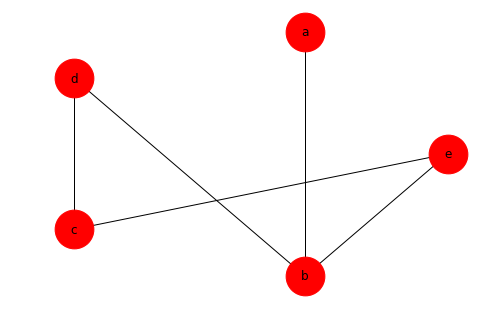

In [2]:
import networkx as nx
import matplotlib.pyplot as plt

g=nx.Graph()
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')
g.add_edge('b','e')

pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=1500, with_labels=True, node_color='r')
plt.show()

Za vrhove u i v kažemo da su **susjedni vrhovi** ako postoji brid e=uv koji ih spaja. Za bridove e i f kažemo da su **susjedni bridovi** ako postoji vrh u tom grafu koji im je zajednički.

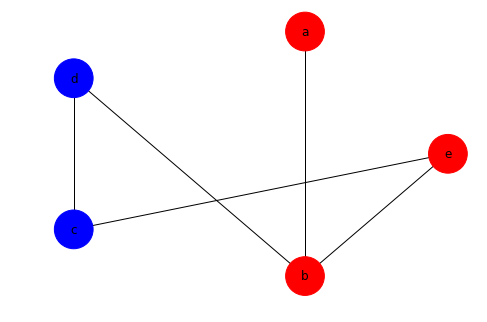

In [3]:
val_map = {'a': 'red',
           'b': 'red',
           'c': 'blue',
           'd': 'blue',
           'e': 'red'}

values = [val_map.get(node) for node in g.nodes()]

nx.draw(g, pos, node_color=values, node_size=1500, with_labels=True)
plt.show()

**Put u grafu** G je konačan slijed bridova v<sub>1</sub>v<sub>2</sub>...v<sub>n</sub> u kojemu su svaka dva brida susjedna i svi vrhovi različiti osim eventualno početnog i krajnjeg.

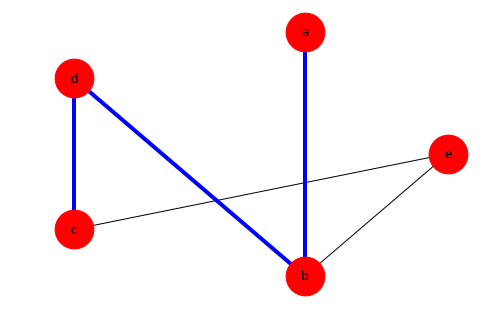

In [4]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='b', debljina=4)
g.add_edge('b','d', boja='b', debljina=4)
g.add_edge('c','e', boja='black', debljina=1)
g.add_edge('b','e', boja='black', debljina=1)

bridovi = g.edges()
boje = [g[u][v]['boja'] for u,v in bridovi]
debljine = [g[u][v]['debljina'] for u,v in bridovi]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

Za graf G kažemo da je **povezan** ako i samo ako postoji put između svaka dva vrha, u suprotnom kažemo da je **nepovezan**. Graf koji smo do sada koristili je primjer povezanog grafa.

Najjednostavniji način prikazivanja grafova je **matricom incidencije**. To je matrica u kojoj se na mjestu *ij* nalazi 1 ako su vrhovi *i* i *j* povezani. Za vrhove koji nisu povezani stavljamo nulu.

Sljedeća matrica incidencije odgovara gornjem grafu:

In [5]:
A = nx.to_numpy_matrix(g)
print(A)

[[ 0.  0.  0.  1.  1.]
 [ 0.  0.  0.  0.  1.]
 [ 0.  0.  0.  1.  1.]
 [ 1.  0.  1.  0.  0.]
 [ 1.  1.  1.  0.  0.]]


Primjer jednog nepovezanog grafa:

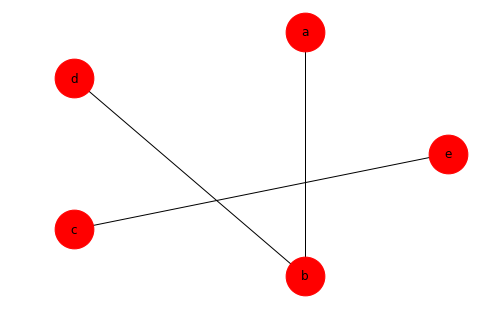

In [6]:
g=nx.Graph()
g.add_edge('a','b') 
g.add_edge('b','d')
g.add_edge('c','e')

pos = nx.circular_layout(g)
nx.draw(g, pos, node_size=1500, with_labels=True, node_color='r')
plt.show()

**Komponenta povezanosti** grafa G je maksimalni povezani podgraf od G, odnosno podgraf koji nije sadržan niti u jednom već povezanom podgrafu. Ako graf ima samo jednu komponentu povezanosti, onda je povezan, a inače je nepovezan.

In [8]:
import scipy as sc, numpy as np
from scipy.sparse import csgraph

A = nx.to_numpy_matrix(g)
A_sparse = sc.sparse.csr_matrix(A);
lap = csgraph.laplacian(A_sparse, normed=False)
eigenv = sc.linalg.eigvals(lap.todense())
eigenv = np.array(eigenv)

zbroj = 0
for a in eigenv:
    if( abs( a ) < 1e-15 ):
        zbroj += 1
print( "Broj komponenti povezanosti gornjeg nepovezanog grafa je ", zbroj)

Broj komponenti povezanosti gornjeg nepovezanog grafa je  2


U praksi se često javlja potreba da svakom bridu e grafa G pridružimo realan broj w(e) koji zovemo **težina brida** e. Takav graf zovemo **težinski graf**. Tako npr. vrhovi grafa mogu predstavljati gradove, a težine bridova udaljenosti među tim gradovima ili troškove cestarine.

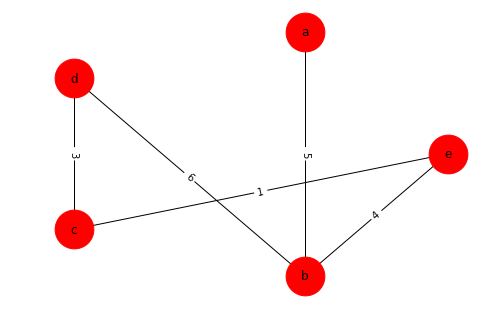

In [9]:
g=nx.Graph()
g.add_edge('a','b', tezina=5) 
g.add_edge('c','d', tezina=3)
g.add_edge('b','d', tezina=6)
g.add_edge('c','e', tezina=1)
g.add_edge('b','e', tezina=4)

nx.draw(g, pos, node_size=1500, with_labels=True, node_color='r')
oznake = nx.get_edge_attributes(g, 'tezina')
nx.draw_networkx_edge_labels(g, pos, edge_labels=oznake)
plt.show()

## Obilasci grafa ##

Obilazak ili **pretraživanje grafa** je sistematičan prolazak njegovim bridovima kako bi se obišli svi njegovi vrhovi ili našao put do određenog vrha. Dva najčešća algoritma za pretraživanje grafova su **pretraživanje u širinu** i **pretraživanje u dubinu**.

### Pretraživanje u širinu ###

Za zadani graf *G = (V, E)* i početni vrh *s* sistematčno pretražujemo bridove grafa *G* kako bismo otkrili sve vrhove dostupne iz *s*. Ideja je da se iz vrha *s* prvo posjete svi susjedi.

Pogledajno na primjeru našeg grafa kojim se redom obilaze vrhovi, ako krenemo iz vrha 'a'.

In [10]:
def bfs(graf, start):
   posjeceni = []
   red = [start]
   while red:
       cvor = red.pop(0)
       if cvor not in posjeceni:
           posjeceni.append(cvor)
           susjedi = graf[cvor]

           for susjed in susjedi:
               red.append(susjed)
   return posjeceni

g = nx.Graph()
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')
g.add_edge('b','e')

print(bfs(g, 'a'))

['a', 'b', 'e', 'd', 'c']


Algoritam pretraživanja u širinu možemo koristiti za pronalazak puta između dva vrha grafa. Pogledajmo kako bi izgledao put od 'a' do 'e':

In [11]:
def bfs_put(graf, start, kraj):
    red = []
    red.append([start])
    while red:
        put = red.pop(0)
        cvor = put[-1]
        if cvor == kraj:
            return put
        for susjedi in graf[cvor]:
            novi_put = list(put)
            novi_put.append(susjedi)
            red.append(novi_put)

print (bfs_put(g, 'a', 'e'))

['a', 'b', 'e']


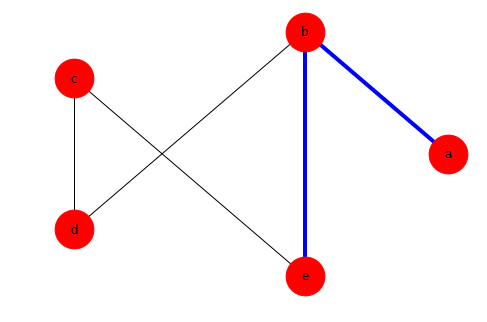

In [13]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='black', debljina=1)
g.add_edge('b','d', boja='black', debljina=1)
g.add_edge('c','e', boja='black', debljina=1)
g.add_edge('b','e', boja='b', debljina=4)

bridovi = g.edges()
boje = [g[u][v]['boja'] for u,v in bridovi]
debljine = [g[u][v]['debljina'] for u,v in bridovi]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

### Pretraživanje u dubinu ###

Drugi algoritam za obilazak je **pretraživanje u dubinu**. Ovaj algoritam također sistematično pronalazi sve vrhove, ali na nešto drugačiji način od pretraživanje u širinu. Naime, umjesto da se širi u grafu, on nastoji uvijek ići "dublje" u graf, tj. za svak susjedni vrh *v* vrha *u* pretraživanje u dubinu se rekurzivno poziva i provjerava susjede vrha *v* prije nego se vrati i provjeri preostale susjede vrha *u*. Pogledajmo kojim redom bi algoritam obišao vrhove ako počnemo iz vrha *a*.

In [12]:
g=nx.Graph()
g.add_edge('b','e')
g.add_edge('a','b') 
g.add_edge('c','d')
g.add_edge('b','d')
g.add_edge('c','e')


def dfs(graf, start, posjeceni):
    if start not in posjeceni:
        posjeceni.append(start)
        for n in graf[start]:
            dfs(graf, n, posjeceni)
    return posjeceni

posjeceni = dfs(g,'a', [])
print(posjeceni)

['a', 'b', 'd', 'c', 'e']


Pomoću pretraživanja u dubinu nađimo put od 'a' do 'e' u našem grafu:

In [13]:
def dfs_put(graf, start, kraj):
    red = [(start, [start])]
    posjeceni = set()
    while red:
        (cvor, put) = red.pop()
        if cvor not in posjeceni:
            if cvor == kraj:
                return put
            posjeceni.add(cvor)
            for susjed in graf[cvor]:
                red.append((susjed, put + [susjed]))

print (dfs_put(g, 'a', 'e'))

['a', 'b', 'e']


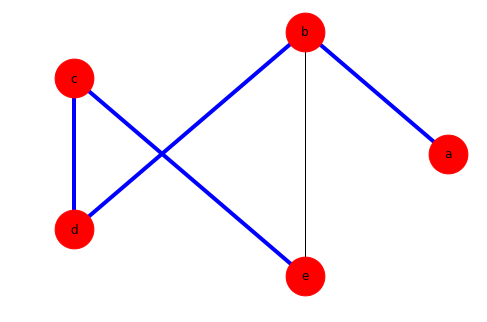

In [23]:
g=nx.Graph()
g.add_edge('a','b', boja='b', debljina=4) 
g.add_edge('c','d', boja='b', debljina=4)
g.add_edge('b','d', boja='b', debljina=4)
g.add_edge('c','e', boja='b', debljina=4)
g.add_edge('b','e', boja='black', debljina=1)

bridovi = g.edges()
boje = [g[u][v]['boja'] for u,v in bridovi]
debljine = [g[u][v]['debljina'] for u,v in bridovi]

pos = nx.circular_layout(g)
nx.draw(g, pos, edge_color=boje, width=debljine, node_size=1500, with_labels=True)

### Usporedba algoritama ###

In [14]:
import pandas as pd
tablica = pd.DataFrame({'Algoritam' : ['BFS', 'DFS'],
                   'Prostorna složenost' : [r'$O(b^d)$', r'$O(bm)$'],
                   'Vremenska složenost' : [r'$O(b^d)$', r'$O(b^m)$'],
                   'Potpunost' : ['DA', 'NE'],
                   'Optimalnost' :['DA', 'NE']})
tablica.set_index('Algoritam', inplace=True)
tablica

,Optimalnost,Potpunost,Prostorna složenost,Vremenska složenost
Algoritam,,,,
BFS,DA,DA,$O(b^d)$,$O(b^d)$
DFS,NE,NE,$O(bm)$,$O(b^m)$


Gdje je:
* b - faktor grananja
* d - dubina optimalnog rješenja + 1
* m - maksimalna dubina stabla (svaki graf malom modifikacijom mozemo pretvoriti u stablo)

**Zaključak**: Oba algoritma su eksponencijalne vremenske složenosti. Pretraživanje u dubinu bolje je prostorne složenosti od pretraživanja u širinu, ali nedostatak je što pretraživanje u dubinu ne daje optimalan rezultat i nije potpuno.

In [15]:
tablica1 = tablica[['Prostorna složenost', 'Vremenska složenost']].tail(1)
tablica1

,Prostorna složenost,Vremenska složenost
Algoritam,,
DFS,$O(bm)$,$O(b^m)$


In [83]:
tablica2 = pd.melt(tablica1, var_name = "vrsta složenosti DFS-a", value_name = "iznosi")
tablica2.set_index('vrsta složenosti DFS-a', inplace=True)
tablica2

,iznosi
vrsta složenosti DFS-a,
Prostorna složenost,$O(bm)$
Vremenska složenost,$O(b^m)$


Možemo još pogledati graf koji dobro prikazuje ovisnost **prostorne složenosti** pretraživanja u dubinu, faktora granjanja i dubine stabla.

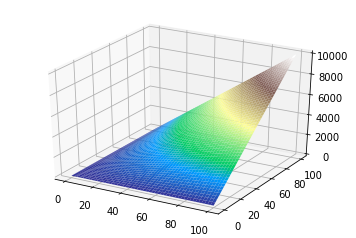

In [16]:
from mpl_toolkits import mplot3d
import numpy as np
fig3d = plt.figure()
ax3d = fig3d.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(0, 100), np.linspace(0, 100))
z = x*y
ax3d.plot_surface(x, y, z, cmap='terrain', linewidth=1)

Prikaz ovisnosti **vremenske složenosti** pretraživanja u dubinu, faktora grananja i dubine stabla.

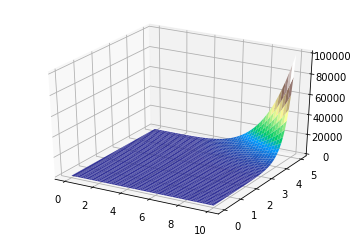

In [37]:
fig3d = plt.figure()
ax3d = fig3d.add_subplot(1, 1, 1, projection='3d')
x, y = np.meshgrid(np.linspace(0, 10), np.linspace(0, 5))
z = x**y
ax3d.plot_surface(x, y, z, cmap='terrain', linewidth=1)